In [62]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy import stats as scp
from collections import Counter
from sklearn.cluster import KMeans

In [2]:
def toBinary(threshold, element):
    return 1 if element > threshold else 0

npToBinary = np.vectorize(toBinary, otypes=[np.uint8])

In [32]:
def byAreaSize(size):
    return size > 50 and size < 10000

In [3]:
pathList = list()
for path, subdirs, files in os.walk(r"/home/martin/Downloads/uninove/"):
    for file in files:
        if ('jpg' in file or 'JPG' in file) and '08' not in file:
            currentFilePath = "".join(path) + file
            pathList.append(currentFilePath)
pathList = sorted(pathList)
pathList

['/home/martin/Downloads/uninove/img01.jpg',
 '/home/martin/Downloads/uninove/img02.jpg',
 '/home/martin/Downloads/uninove/img03.jpg',
 '/home/martin/Downloads/uninove/img04.JPG',
 '/home/martin/Downloads/uninove/img05.jpg',
 '/home/martin/Downloads/uninove/img06.jpg',
 '/home/martin/Downloads/uninove/img07.jpg',
 '/home/martin/Downloads/uninove/img09.jpg',
 '/home/martin/Downloads/uninove/img10.jpg',
 '/home/martin/Downloads/uninove/img11.jpg',
 '/home/martin/Downloads/uninove/img12.jpg',
 '/home/martin/Downloads/uninove/img13.jpg',
 '/home/martin/Downloads/uninove/img14.jpg',
 '/home/martin/Downloads/uninove/img15.jpg',
 '/home/martin/Downloads/uninove/img16.jpg',
 '/home/martin/Downloads/uninove/img17.jpg',
 '/home/martin/Downloads/uninove/img18.jpg',
 '/home/martin/Downloads/uninove/img19.jpg',
 '/home/martin/Downloads/uninove/img20.jpg',
 '/home/martin/Downloads/uninove/img21.jpg',
 '/home/martin/Downloads/uninove/img22.jpg',
 '/home/martin/Downloads/uninove/img23.jpg',
 '/home/ma

In [4]:
def analyzeImage(limiarBase, caminhoImagem):

    LIMIAR = limiarBase
    contador = None
    pecas = dict()

    testImage = cv.imread(caminhoImagem, cv.IMREAD_GRAYSCALE)

    while True:

        binaryImage = npToBinary(LIMIAR, testImage)

        nlabels, labels, stats, centroids = cv.connectedComponentsWithStats(binaryImage, 4, cv.CV_32S)

        # só estamos interessados na coluna de aŕea total do componente conexo
        areaSlice = stats[:, cv.CC_STAT_AREA]
        
        # realizamos o sort para que se possa remover o maior, que será sempre o background
        areaArray = np.sort(areaSlice.reshape(areaSlice.size, 1), axis=0)

        kmeans = KMeans(n_clusters=2, max_iter=100).fit(areaArray[:-1])
        contador = Counter(kmeans.labels_)

        pecas["porcas"] = contador.get(0)
        pecas["parafusos"] = contador.get(1)

        if LIMIAR > 250:
            raise Exception("LIMIAR maior que 250")
            break

        if pecas["porcas"] > 10 or pecas["parafusos"] > 10:
            LIMIAR += 5
        elif pecas["porcas"] < 11 or pecas["parafusos"] < 11:
            return (pecas, LIMIAR)

In [5]:
parafusos = [10,10,10,5,9,10,7,7,10,10,10,10,10,10,9,0,7,10,7,10,10,10,8,9,10]
porcas = [10,10,10,10,9,10,10,10,10,9,0,10,9,10,10,10,7,10,9,10,10,10,8,10,9]

acertosParafusos = 0
acertosPorcas = 0
acertos = 0

for index, imagePath in enumerate(pathList):
    baseLimiar = 150
    pecas, LIMIAR = analyzeImage(baseLimiar, imagePath)
    
    contPorcas = pecas["porcas"]
    contParafusos = pecas["parafusos"]
    
    if (porcas[index] == contPorcas):
        acertosPorcas += 1
    if (parafusos[index] == contParafusos):
        acertosParafusos += 1
    if (porcas[index] == contPorcas and parafusos[index] == contParafusos):
        acertos += 1
    
    print("INFO; Imagem No", index)
    print("Imagem: ", imagePath)
    print("Limiar: {}. No Porcas: {}, No Parafusos: {}".format(LIMIAR, contPorcas, contParafusos))
    print("Número correto de porcas: {}, parafusos: {}".format(porcas[index], parafusos[index]))
    print("\nTaxa de acertos (Parafusos):", round((acertosParafusos/len(porcas)*100),2))
    print("Taxa de acertos (Porcas): ", round((acertosPorcas/len(porcas)*100),2))
    print("Taxa de acertos:", round((acertos/25*100),2))
    print("----------")

INFO; Imagem No 0
Imagem:  /home/martin/Downloads/uninove/img01.jpg
Limiar: 150. No Porcas: 10, No Parafusos: 10
Número correto de porcas: 10, parafusos: 10

Taxa de acertos (Parafusos): 4.0
Taxa de acertos (Porcas):  4.0
Taxa de acertos: 4.0
----------
INFO; Imagem No 1
Imagem:  /home/martin/Downloads/uninove/img02.jpg
Limiar: 160. No Porcas: 10, No Parafusos: 10
Número correto de porcas: 10, parafusos: 10

Taxa de acertos (Parafusos): 8.0
Taxa de acertos (Porcas):  8.0
Taxa de acertos: 8.0
----------
INFO; Imagem No 2
Imagem:  /home/martin/Downloads/uninove/img03.jpg
Limiar: 155. No Porcas: 10, No Parafusos: 10
Número correto de porcas: 10, parafusos: 10

Taxa de acertos (Parafusos): 12.0
Taxa de acertos (Porcas):  12.0
Taxa de acertos: 12.0
----------
INFO; Imagem No 3
Imagem:  /home/martin/Downloads/uninove/img04.JPG
Limiar: 205. No Porcas: 5, No Parafusos: 10
Número correto de porcas: 10, parafusos: 5

Taxa de acertos (Parafusos): 12.0
Taxa de acertos (Porcas):  12.0
Taxa de acert

ValueError: Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required.

DescribeResult(nobs=10, minmax=(array([2421], dtype=int32), array([2629], dtype=int32)), mean=array([2543.2]), variance=array([3932.4]), skewness=array([-0.63398065]), kurtosis=array([-0.40595156]))


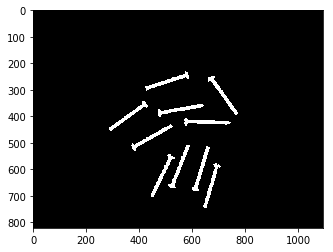

In [63]:
currentImage = "/home/martin/Downloads/uninove/img11.jpg"
testImage = cv.imread(currentImage, cv.IMREAD_GRAYSCALE)

binaryImage = npToBinary(170, testImage)

nlabels, labels, stats, centroids = cv.connectedComponentsWithStats(binaryImage, 4, cv.CV_32S)

# só estamos interessados na coluna de aŕea total do componente conexo
areaSlice = stats[:, cv.CC_STAT_AREA]

# realizamos o sort para que se possa remover valores incorretos, 
# como áreas muito pequenas ou o background
areaArray = np.sort(np.asarray(list(filter(byAreaSize, areaSlice))))
areaArray = areaArray.reshape(areaArray.size, 1)

print(scp.describe(areaArray))

kmeans = KMeans(n_clusters=2, max_iter=100).fit(areaArray[:-1])
contador = Counter(kmeans.labels_)


plt.imshow(binaryImage, cmap="gray")

In [33]:
list(filter(byAreaSize, [300, 10, 200, 90000]))

[300, 200]